In [1]:
# !pip install --upgrade pip
# !conda install pandas
import sys

sys.executable

'/Users/yizhihenpidehou/opt/anaconda3/envs/eg/bin/python'

In [12]:
import easygraph as eg
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function
import time

import numpy as np
import pandas as pd

# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [50]:
# from easygraph.datasets import CoraGraphDataset, KarateClubDataset
from easygraph.functions.community import modularity, greedy_modularity_communities
# dataset = eg.CoraGraphDataset(force_reload=True)
dataset = eg.CiteseerGraphDataset(force_reload=True)
num_classes = dataset.num_classes
g = dataset[0]
labels = g.ndata['label']

buildin url: https://data.dgl.ai/dataset/citeseer.zip
dd
Extracting file to /Users/yizhihenpidehou/.dgl/citeseer
Finished data loading and preprocessing.
  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.


/Users/yizhihenpidehou/Desktop/fdu/eg/Easy-Graph/build/lib.macosx-10.9-x86_64-3.9/easygraph/datasets/citation_graph.py:287: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


In [4]:
# com = greedy_modularity_communities(g)
# label = []
# k = 0
# for i in range(len(com)):
#     for j in range(len(com[i])):
#         label.append(k)
#     k+=1

# label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [51]:
labels = np.array(labels)
labels

array([3, 1, 5, ..., 3, 1, 5])

In [52]:
len(g.edges)

9228

##### DeepWalk

In [53]:
import torch
from easygraph.functions.graph_embedding import *
deepwalk_emb, _ = deepwalk(g, dimensions=32, walk_length=50, num_walks=20)
deepwalk_emb, len(deepwalk_emb)

Walk iteration:


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  7.10it/s]


({0: array([ 1.7799947 , -0.9833163 , -1.3290869 , -1.0270467 ,  2.4598157 ,
          1.9537746 , -2.0979393 , -1.9536942 , -3.1564178 ,  0.17032544,
          0.854735  , -0.19330032,  0.34283924,  0.2881913 , -1.6860235 ,
         -0.8916704 , -1.1131629 ,  1.0847157 , -0.07824454,  3.5708525 ,
          0.58765495,  0.7912682 , -1.5346485 , -0.8729639 ,  0.7368837 ,
          0.6170461 , -0.6471583 , -0.29919672, -2.4723155 , -0.372504  ,
          0.16871317, -0.5051521 ], dtype=float32),
  1: array([-0.88627553, -1.3892701 , -0.7703411 , -1.5994425 ,  2.537629  ,
         -0.09881371,  3.5815644 , -1.7413692 ,  0.15155475,  0.5396298 ,
         -2.1963136 , -1.3177694 ,  1.6034416 ,  0.6426171 , -1.9833797 ,
          0.34876537,  2.3578892 ,  0.28884563,  3.0620608 ,  1.6351881 ,
          3.3348536 , -0.5491802 ,  1.3804526 , -2.9016235 , -0.69702786,
         -1.8811176 , -0.26301977,  0.91550726, -1.8722847 ,  0.5876562 ,
          0.65514886,  0.9570902 ], dtype=float32),
  

In [54]:
dw_emb = []
for i in range(0, len(deepwalk_emb)):
    dw_emb.append(list(deepwalk_emb[i]))
print(len(dw_emb))
dw_emb = np.array(dw_emb)
dw_emb

3327


array([[ 1.7799947 , -0.9833163 , -1.3290869 , ..., -0.372504  ,
         0.16871317, -0.5051521 ],
       [-0.88627553, -1.3892701 , -0.7703411 , ...,  0.5876562 ,
         0.65514886,  0.9570902 ],
       [-0.16331288, -0.99226534,  0.97669905, ...,  0.68482995,
        -3.175349  ,  0.410041  ],
       ...,
       [ 0.59198296, -0.8445302 , -0.38409206, ...,  0.21194401,
        -1.4611179 ,  0.870004  ],
       [-0.8672805 , -1.3434896 ,  3.1982899 , ..., -1.7056127 ,
        -3.415572  ,  0.8862018 ],
       [ 1.8110347 , -1.1915036 ,  0.42724866, ..., -0.54741627,
        -1.2167243 , -0.34049702]], dtype=float32)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3327 samples in 0.000s...
[t-SNE] Computed neighbors for 3327 samples in 0.176s...


/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 3327
[t-SNE] Computed conditional probabilities for sample 2000 / 3327
[t-SNE] Computed conditional probabilities for sample 3000 / 3327
[t-SNE] Computed conditional probabilities for sample 3327 / 3327
[t-SNE] Mean sigma: 2.890055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.770691
[t-SNE] KL divergence after 1000 iterations: 1.604115


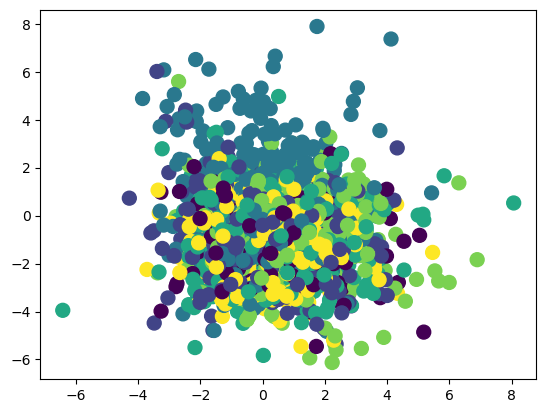

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(dw_emb)
# plt.figure(figsize=(6, 6))
plt.scatter(dw_emb[:, 0], dw_emb[:, 1], c=labels, s=100)
plt.show()
# plt.savefig('z.pdf')

/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3327 samples in 0.000s...
[t-SNE] Computed neighbors for 3327 samples in 0.169s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3327
[t-SNE] Computed conditional probabilities for sample 2000 / 3327
[t-SNE] Computed conditional probabilities for sample 3000 / 3327
[t-SNE] Computed conditional probabilities for sample 3327 / 3327
[t-SNE] Mean sigma: 2.890055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.770691
[t-SNE] KL divergence after 1000 iterations: 1.604115


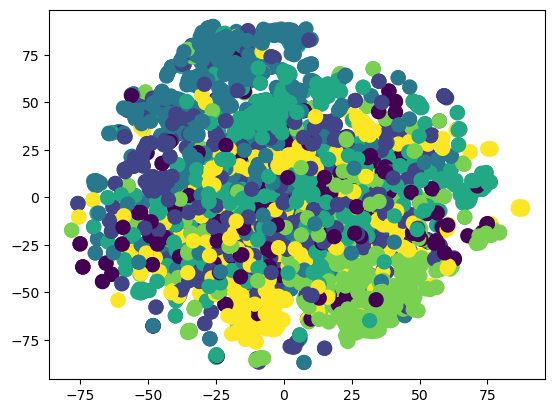

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(dw_emb)
# plt.figure(figsize=(6, 6))
plt.scatter(z[:, 0], z[:, 1], c=labels, s=100)
plt.savefig('dw_citesee.pdf', bbox_inches='tight')
plt.show()

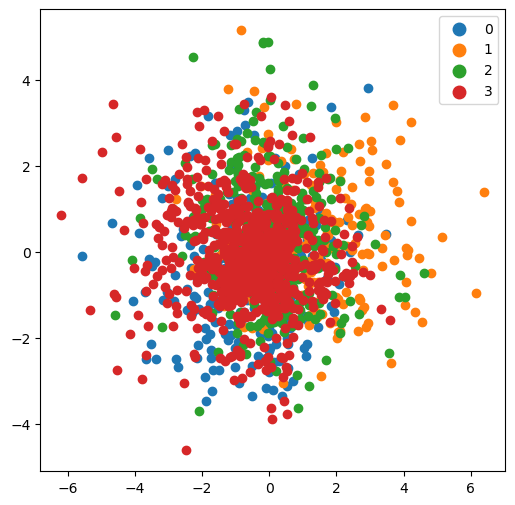

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
num_categories = 4
for lab in range(num_categories):
    indices = labels == lab
    ax.scatter(dw_emb[indices,0],dw_emb[indices,1], label = lab ,alpha=1)
ax.legend(fontsize='medium', markerscale=1.5)
plt.show()

In [57]:

tsne3 = TSNE(3, verbose=1)
z3 = tsne3.fit_transform(dw_emb)
print(z3)
num_categories = 4
for lab in range(num_categories):
    indices = label == lab
    ax.scatter(z3[indices, 0], z3[indices, 1], z3[indices, 2], label=lab, alpha=0.8)
ax.legend(fontsize='medium', markerscale=2)
plt.show()

/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3327 samples in 0.001s...
[t-SNE] Computed neighbors for 3327 samples in 0.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3327
[t-SNE] Computed conditional probabilities for sample 2000 / 3327
[t-SNE] Computed conditional probabilities for sample 3000 / 3327
[t-SNE] Computed conditional probabilities for sample 3327 / 3327
[t-SNE] Mean sigma: 2.890055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.158012
[t-SNE] KL divergence after 1000 iterations: 1.521316
[[-24.680714   43.038746    8.704299 ]
 [  9.542265  -10.894887   18.24406  ]
 [  1.3262562  10.175319   -9.225096 ]
 ...
 [-13.169055   -1.1387945  23.830492 ]
 [-21.185919    2.5030725   4.542611 ]
 [ 20.344643   -6.9326024   4.8721824]]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 3327 but corresponding boolean dimension is 2708

#### Node2Vec

In [60]:
import torch
from easygraph.functions.graph_embedding import *
node2vec_emb, _ = node2vec(g, dimensions=32, walk_length=30, num_walks=10, p=0.25, q=4)
node2vec_emb, len(node2vec_emb)

100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  4.95it/s]


({0: array([ 1.6409017 , -0.9469399 , -0.03806819,  1.1713403 , -1.2997059 ,
         -2.5294204 ,  0.65935713, -0.551632  ,  0.7047078 ,  0.63948464,
         -0.8532761 ,  1.1481427 , -0.03429467,  0.11281448,  0.7599644 ,
         -2.234045  ,  0.21479873,  0.6018636 ,  1.712249  ,  1.3307387 ,
          0.21066684,  1.9306242 , -1.5448507 ,  0.69704014,  1.2619174 ,
         -1.2469331 ,  0.7839019 ,  1.9301056 , -3.174611  ,  0.08706882,
         -0.18206137, -0.20007199], dtype=float32),
  1: array([ 1.9252108 , -1.1581571 , -0.9686576 ,  1.3715458 , -0.7188712 ,
         -3.6398766 ,  0.2791426 , -1.0120194 , -1.3405278 , -1.5430114 ,
         -1.4440693 , -2.0503037 ,  1.9785163 , -0.54959327,  0.40466878,
         -0.24702719, -0.7647767 , -1.1763465 ,  1.3413994 ,  1.0556723 ,
          1.2207917 ,  0.998881  , -2.341433  , -0.60935867, -0.29837048,
          0.95633155, -1.0275662 ,  1.6830572 ,  0.32089496,  1.2479051 ,
          1.4230607 ,  0.6698285 ], dtype=float32),
  

In [61]:
n2v_emb = []
for i in range(0, len(node2vec_emb)):
    n2v_emb.append(list(node2vec_emb[i]))
print(len(n2v_emb))
n2v_emb = np.array(n2v_emb)
n2v_emb

3327


array([[ 1.6409017 , -0.9469399 , -0.03806819, ...,  0.08706882,
        -0.18206137, -0.20007199],
       [ 1.9252108 , -1.1581571 , -0.9686576 , ...,  1.2479051 ,
         1.4230607 ,  0.6698285 ],
       [ 1.3460793 , -1.6899236 , -1.1044092 , ...,  1.4339387 ,
        -0.4400137 , -1.0397781 ],
       ...,
       [ 0.9266604 , -1.4732605 ,  0.30408376, ...,  2.6081402 ,
         1.8326123 ,  0.19224952],
       [ 0.6685223 , -2.3134987 , -0.44155166, ...,  2.656437  ,
        -1.2600125 , -0.8065167 ],
       [ 0.24347346, -1.1793486 , -0.16106255, ...,  0.5787883 ,
        -0.8222428 ,  0.17065722]], dtype=float32)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3327 samples in 0.000s...
[t-SNE] Computed neighbors for 3327 samples in 0.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3327
[t-SNE] Computed conditional probabilities for sample 2000 / 3327


/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 3000 / 3327
[t-SNE] Computed conditional probabilities for sample 3327 / 3327
[t-SNE] Mean sigma: 2.123059
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.078621
[t-SNE] KL divergence after 1000 iterations: 1.756200


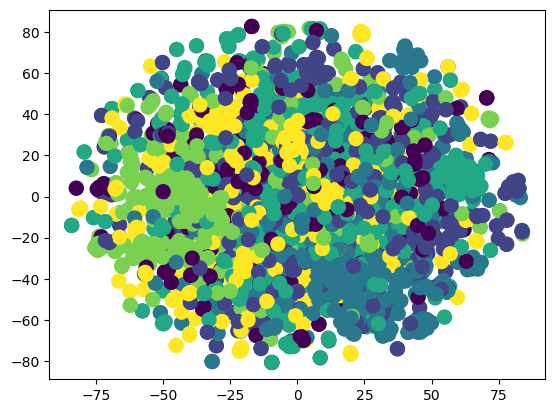

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(n2v_emb)
# plt.figure(figsize=(6, 6))
plt.scatter(z[:, 0], z[:, 1], c=labels, s=100)
plt.savefig('n2v_citesee.pdf', bbox_inches='tight')
plt.show()

In [63]:
model = LINE(g, embedding_size=32, order='second')
print('**************')
model.train(batch_size=64, epochs=1, verbose=2)
line_emb = model.get_embeddings()
print('**************')

l_emb = []
for i in range(0, len(line_emb)):
    l_emb.append(list(line_emb[i]))
print(len(l_emb))
l_emb = np.array(l_emb)
l_emb

**************
866/866 - 1s - loss: 0.6930
**************
3327


array([[-0.03356764,  0.03316538, -0.08165146, ..., -0.07252568,
        -0.03021055,  0.01257929],
       [-0.05245007, -0.01290854, -0.01767545, ...,  0.00561927,
        -0.0292977 ,  0.06549095],
       [-0.02218378,  0.00616466,  0.02522917, ...,  0.07776006,
         0.05232409, -0.0253807 ],
       ...,
       [-0.01659305,  0.00963516,  0.02835023, ...,  0.06929582,
         0.05575337, -0.00040945],
       [ 0.06195781,  0.05226088,  0.06730604, ...,  0.03975333,
        -0.06406383,  0.00539371],
       [-0.01703031, -0.0343946 ,  0.04758547, ..., -0.03365318,
        -0.02175277,  0.00721926]], dtype=float32)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3327 samples in 0.000s...
[t-SNE] Computed neighbors for 3327 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3327
[t-SNE] Computed conditional probabilities for sample 2000 / 3327

/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(



[t-SNE] Computed conditional probabilities for sample 3000 / 3327
[t-SNE] Computed conditional probabilities for sample 3327 / 3327
[t-SNE] Mean sigma: 0.061428
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.681122
[t-SNE] KL divergence after 1000 iterations: 3.539986


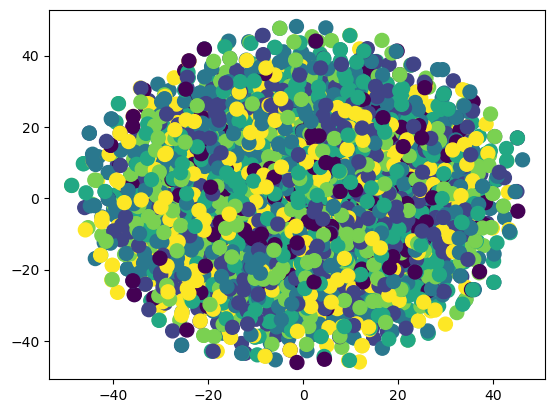

In [64]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(l_emb)
# plt.figure(figsize=(6, 6))
plt.scatter(z[:, 0], z[:, 1], c=labels, s=100)
plt.savefig('line_citesee.pdf', bbox_inches='tight')
plt.show()

In [65]:
model = SDNE(g, hidden_size=[128, 32])
model.train(batch_size=32, epochs=40, verbose=2)
sdne_emb = model.get_embeddings()


sd_emb = []
for i in range(0, len(sdne_emb)):
    sd_emb.append(list(sdne_emb[i]))
print(len(sd_emb))
sd_emb = np.array(sd_emb)
sd_emb

Epoch 1/40
1s - loss:  68.9122 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 2/40
1s - loss:  68.8867 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 3/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 4/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 5/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 6/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 7/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 8/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 9/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 10/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 11/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 12/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 13/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 14/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 15/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 16/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 17/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 18/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 19/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 20/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 21/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 22/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 23/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 24/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 25/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 26/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 27/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 28/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 29/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 30/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 31/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 32/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 33/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 34/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 35/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 36/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 37/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 38/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 39/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000


Epoch 40/40
1s - loss:  68.8852 - 2nd_loss:  68.8846 - 1st_loss:  0.0000
3327


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3327 samples in 0.000s...
[t-SNE] Computed neighbors for 3327 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3327
[t-SNE] Computed conditional probabilities for sample 2000 / 3327
[t-SNE] Computed conditional probabilities for sample 3000 / 3327
[t-SNE] Computed conditional probabilities for sample 3327 / 3327
[t-SNE] Mean sigma: 0.000000


/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yizhihenpidehou/opt/anaconda3/envs/eg/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 118.001434
[t-SNE] KL divergence after 800 iterations: 2.738781


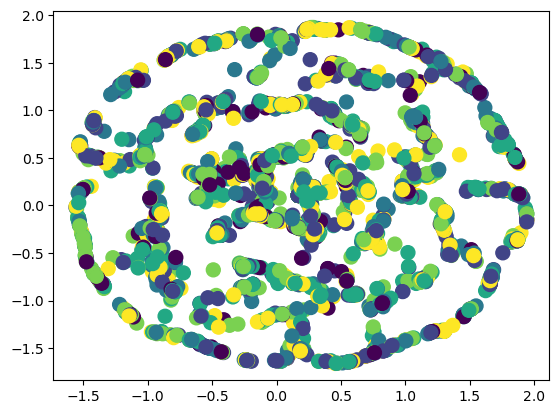

In [66]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(sd_emb)
# plt.figure(figsize=(6, 6))
plt.scatter(z[:, 0], z[:, 1], c=labels, s=100)
plt.savefig('sdne_citesee.pdf', bbox_inches='tight')
plt.show()
